In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create and train simple regression model of radiation to Temperature.

In this part, we build a simple linear regression model to predict temperature based on solar radiation using the `SolarPrediction.csv` dataset.

In [2]:
weather_df = pd.read_csv("SolarPrediction.csv")


In [3]:
weather_df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [43]:
weather_df['Radiation'] = pd.to_numeric(weather_df['Radiation'], errors='coerce')
weather_df['Temperature'] = pd.to_numeric(weather_df['Temperature'], errors='coerce')
weather_df.dropna(subset=['Radiation', 'Temperature'], inplace=True)
weather_df = weather_df[weather_df['Radiation'] > 50] # Only day
corr_matrix = weather_df.select_dtypes(include='number').corr()
corr_list = corr_matrix.unstack()
corr_list = corr_list[corr_list < 1]
corr_list.index = [frozenset([i, j]) for i, j in corr_list.index]
corr_list = corr_list[~corr_list.index.duplicated()]
corr_list = corr_list.sort_values(ascending=False)
print(corr_list.head(25))


(Temperature, Radiation)                 0.570963
(Temperature, Pressure)                  0.366942
(Radiation, Pressure)                    0.233588
(UNIXTime, WindDirection(Degrees))       0.163668
(UNIXTime, Speed)                        0.162189
(Radiation, Speed)                       0.136495
(WindDirection(Degrees), Speed)          0.065609
(WindDirection(Degrees), Humidity)       0.041110
(Temperature, Speed)                     0.031041
(UNIXTime, Humidity)                    -0.006666
(Speed, Humidity)                       -0.070507
(Radiation, WindDirection(Degrees))     -0.108209
(Radiation, UNIXTime)                   -0.126993
(Temperature, WindDirection(Degrees))   -0.142804
(Pressure, Speed)                       -0.192776
(WindDirection(Degrees), Pressure)      -0.237932
(Pressure, Humidity)                    -0.271308
(UNIXTime, Pressure)                    -0.344906
(Radiation, Humidity)                   -0.432475
(Temperature, UNIXTime)                 -0.451593


## Based on the correlation analysis of all numeric features in the dataset:

- **Radiation and Temperature** show a relatively strong positive correlation: **0.571**.  
- Other correlations with Temperature are much weaker or negative (e.g., Temperature and Humidity: -0.635, UNIXTime and Temperature: -0.452).  

**Conclusion:**  
Since Radiation is the most strongly correlated feature with Temperature, it was chosen as the independent variable (X) and Temperature as the dependent variable (y) for a simple linear regression model.


In [38]:

weather_df['Radiation'] = pd.to_numeric(weather_df['Radiation'], errors='coerce')
weather_df['Temperature'] = pd.to_numeric(weather_df['Temperature'], errors='coerce')

weather_df.dropna(subset=['Radiation', 'Temperature'], inplace=True)

weather_df = weather_df[weather_df['Radiation']  > 50]  # Tylko dzień

x = weather_df['Radiation'].values[:1000].reshape(-1,1)
y = weather_df['Temperature'].values[:1000]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# b) Evaluate and visualize the created model

After training the linear regression model, we evaluate and visualize its performance.

## Model predictions
The trained model is used to predict:

`y_pred` — predictions for all input samples (x)

`y_test_pred` — predictions for the test set (X_test)
These values represent the model’s estimated temperature based on radiation levels.

## Sorting for visualization
To produce a smooth regression line, the input feature x and corresponding predictions y_pred are sorted in ascending order. This avoids the line “zigzagging” when plotted.

## Visualization
The actual temperature values are displayed as blue scatter points, while the model’s predictions are shown as a red regression line.

## Interpretation
The regression line represents the best linear fit between **radiation** and **temperature**, showing a clear positive correlation — as solar radiation increases, temperature generally rises.
The quality of this fit can later be assessed more quantitatively using metrics such as `Mean Squared Error`.

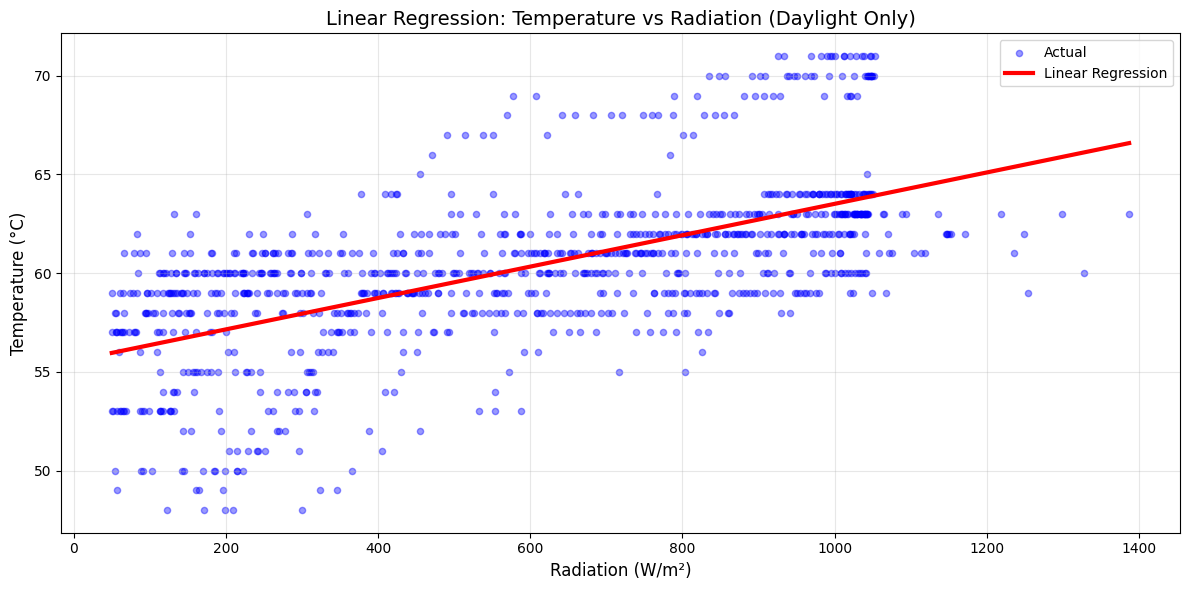

Mean squared error: 10.711749957386216


In [39]:

y_pred = model.predict(x)
y_test_pred = model.predict(X_test)

sorted_idx = np.argsort(x.flatten())
x_sorted = x.flatten()[sorted_idx]
y_sorted = y_pred[sorted_idx]

plt.figure(figsize=(12,6))
plt.scatter(x.flatten(), y, alpha=0.4, s=20, label="Actual", color='blue')
plt.plot(x_sorted, y_sorted, color='red', linewidth=3, label="Linear Regression")
plt.xlabel("Radiation (W/m²)", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Linear Regression: Temperature vs Radiation (Daylight Only)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print('Mean squared error:',mean_squared_error(y, (x*model.coef_+model.intercept_)))



In [7]:
print("\n=== MODEL EVALUATION ===")
print(f"Training MSE: {mean_squared_error(y_train, model.predict(X_train)):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Overall MSE: {mean_squared_error(y, y_pred):.2f}")



=== MODEL EVALUATION ===
Training MSE: 10.82
Test MSE: 10.29
Overall MSE: 10.71


## Observations
We observe that for very high-degree polynomial regression, the training error does not always decrease and may slightly increase. This is due to numericazl instability caused by large values in high-degree polynomial features and an ill-conditioned design matrix. Scaling the input features or using regularization can mitigate this issue.


## c) Create and plot higher order polynomial regression models.

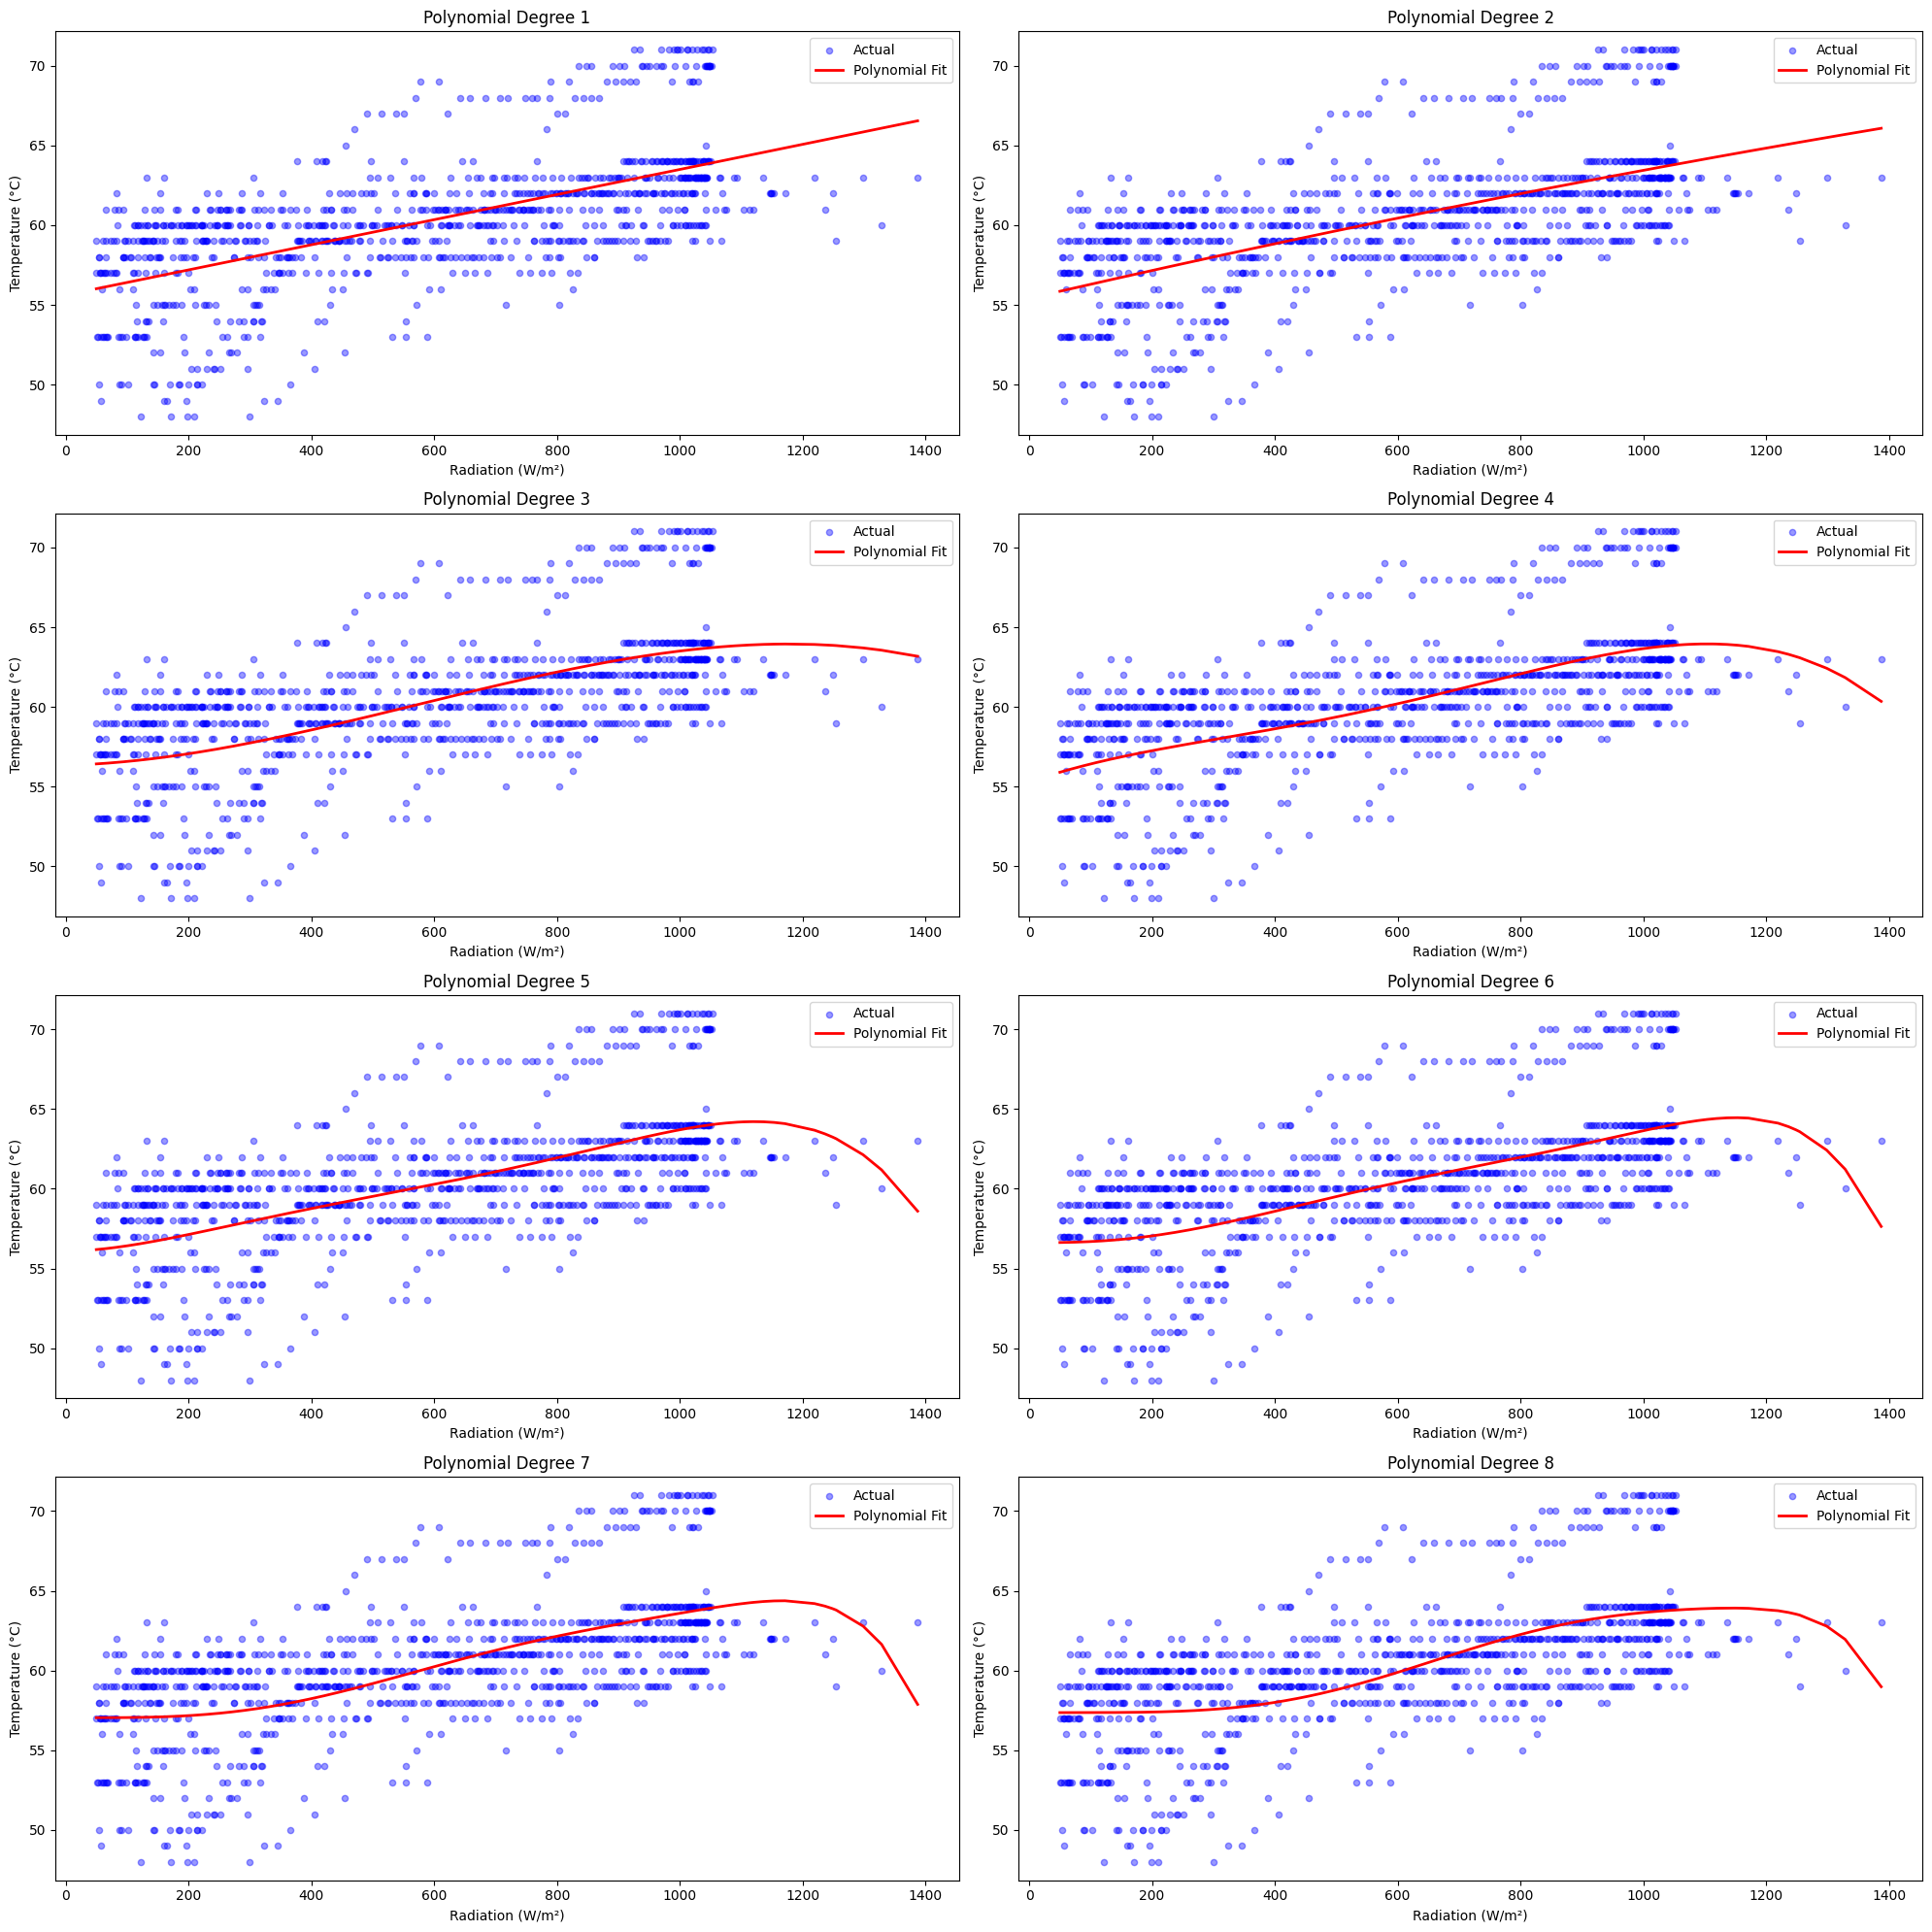

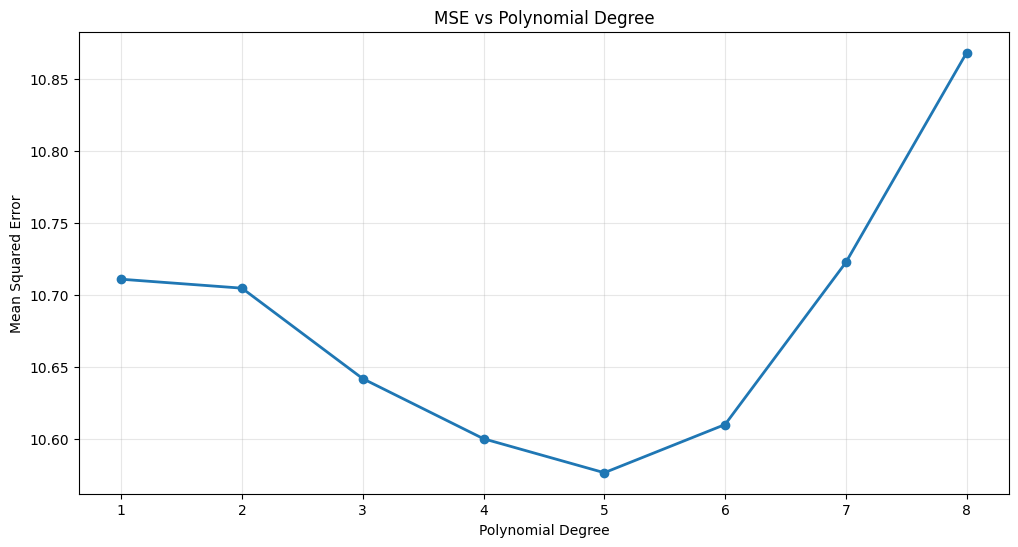

In [40]:
# -----------------------------
# c) Polynomial Regression
# -----------------------------
mean_errors = []

fig, axs = plt.subplots(4, 2, figsize=(20, 20))

for order in range(1, 9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_poly = poly.fit_transform(x)

    model.fit(X_poly, y)

    y_poly_pred = model.predict(X_poly)

    x_flat = x.flatten()
    sorted_idx = x_flat.argsort()
    x_sorted = x_flat[sorted_idx]
    y_sorted = y_poly_pred[sorted_idx]

    row = (order - 1) // 2
    col = (order - 1) % 2

    axs[row, col].scatter(x_flat, y, alpha=0.4, s=20, label="Actual", color='blue')
    axs[row, col].plot(x_sorted, y_sorted, color='red', linewidth=2, label="Polynomial Fit")
    axs[row, col].set_title(f'Polynomial Degree {order}')
    axs[row, col].set_xlabel("Radiation (W/m²)")
    axs[row, col].set_ylabel("Temperature (°C)")
    axs[row, col].legend()

    mean_errors.append(mean_squared_error(y, y_poly_pred))

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(1, 9), mean_errors, marker='o', linewidth=2)
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.grid(alpha=0.3)
plt.show()

### Polynomial Regression

Polynomial regression was used to model the nonlinear relationship between **Radiation** and **Temperature** for degrees 1–8.  
As the degree increases, the model fits the data more closely, reducing error up to a point - after which overfitting occurs.  
An intermediate degree (around 3–4) provides the best balance between accuracy and generalization.








# Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.
-  Split your data into training sample and test sample and repeat exercise 1
-  Plot training and test errors for all models.



In this exercise, the dataset was split into **training (70%)** and **test (30%)** subsets to evaluate how well the polynomial regression models generalize to unseen data.
For each polynomial degree (1–8), the model was trained on the training data and evaluated on both the training and test sets. The Mean Squared Error (MSE) was calculated for each.

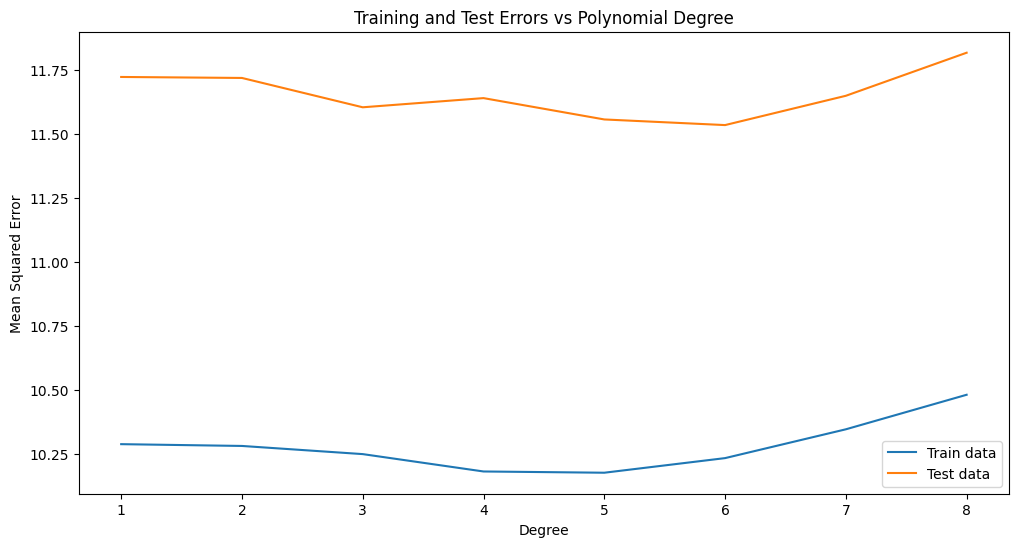

In [41]:
mean_train = []
mean_test = []

degree = list(range(1, 9))

for order in degree:
    poly = PolynomialFeatures (order, include_bias = False)
    X_order = poly.fit_transform (x)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model = LinearRegression()
    model.fit(X_train, y_train)

    model2 = LinearRegression ()
    model2.fit (X_test,y_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mean_train.append(mean_squared_error(y_train, y_train_pred))
    mean_test.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(12,6))
plt.plot(degree, mean_train, label="Train data")
plt.plot(degree, mean_test, label="Test data")
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Errors vs Polynomial Degree")
plt.legend()
plt.show()


## Expected behavior note:
In theory, the training error should not increase with model complexity.
If a small increase occurs, it is usually due to numerical instability from very large polynomial feature values.

# a) Single Feature Polynomial Regression

In this part, a polynomial regression model was trained to predict solar radiation based on temperature.



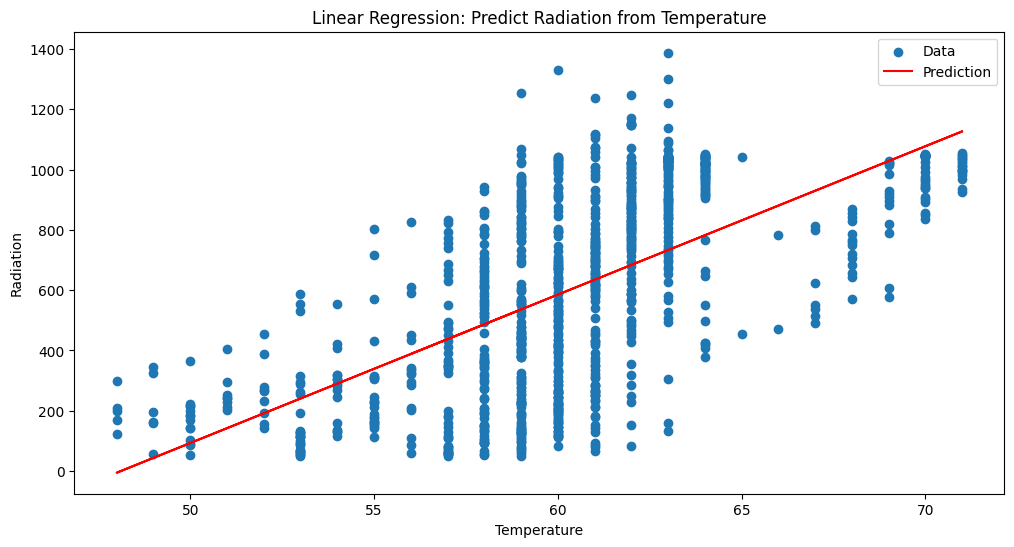

Mean squared error equals: 951444432.7915794


In [10]:
X = weather_df['Temperature'].values.reshape(-1,1)[:1000]
y = weather_df['Radiation'].values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plt.scatter(X, y, label="Data")

plt.plot(X, X * model.coef_ + model.intercept_, color="red", label="Prediction")
plt.xlabel("Temperature")
plt.ylabel("Radiation")
plt.title("Linear Regression: Predict Radiation from Temperature")
plt.legend()
plt.show()

error = mean_squared_error(y, (x*model.coef_+model.intercept_))
print('Mean squared error equals:', error)



## Results:

- Mean Squared Error (MSE): 951444432.7915794


## Observation:

- The relatively high MSE suggests that predicting **Radiation from Temperature** alone does not work very well.  
- The relationship between these variables is nonlinear and influenced by other environmental factors (humidity, pressure, wind speed, etc.).  
- Therefore, a single-feature model is too simplistic and suffers from underfitting; it cannot capture the complexity of the underlying physical process.  
- Notably, this MSE is much higher than when predicting **Temperature from Radiation**. This difference arises primarily due to the **distribution and scale of the target variable**: Radiation values vary over a larger range and are more skewed, so errors appear much larger numerically compared to Temperature.


## b) Multi-Feature Polynomial Regression

To improve performance, multiple meteorological variables were added as predictors:

Temperature, Pressure, Humidity, and Speed.

A 3rd-degree polynomial regression was again used to allow nonlinear interactions between these features.

In [11]:
features = ['Temperature']
X = weather_df[features].values[:1000]
y = weather_df['Radiation'].values[:1000]

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.5, random_state=43
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals:", mean_squared_error(y_pred, y_test))


Mean squared error equals: 61776.21740497434


In [16]:
features = ['Temperature', 'Humidity']
X = weather_df[features].values[:1000]
y = weather_df['Radiation'].values[:1000]

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.5, random_state=43
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals:", mean_squared_error(y_pred, y_test))


Mean squared error equals: 56302.782959987955


In [17]:
from sklearn.preprocessing import PolynomialFeatures

features = ['Temperature', 'Pressure', 'Humidity', 'Speed']
X = weather_df[features].values[:1000]
y = weather_df['Radiation'].values[:1000]

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error equals:", mse)


Mean squared error equals: 45793.998994316265


## Multi-Feature Polynomial Regression - Results

We applied 3rd-degree polynomial regression to predict **Radiation** based on meteorological features. The analysis was performed incrementally by adding more features:

1. **Temperature only**  
   - Mean Squared Error (MSE): 61776.21740497434  
   - Using only temperature as a predictor results in relatively high error, indicating that Radiation is influenced by other environmental factors.

2. **Temperature + Humidity**  
   - Mean Squared Error (MSE): 56302.782959987955
   - Adding Humidity improves the model performance, as it captures additional variation in Radiation that Temperature alone cannot explain.

3. **Temperature + Humidity + Pressure + Speed**  
   - Mean Squared Error (MSE): 45793.998994316265  
   - Including Pressure and Wind Speed further reduces the error, showing that multiple meteorological factors contribute to Radiation.  
   - This demonstrates the importance of using a **multi-feature model** and shows that polynomial interactions help capture nonlinear relationships.

**Observations:**

- MSE decreases as more relevant features are added, highlighting that **Radiation depends on several interrelated environmental variables**.  
- The model with four features captures more complex patterns, but some error remains, indicating that there may be other influencing factors or inherent variability in the data.  
- Overall, multi-feature polynomial regression provides a more accurate and realistic prediction than single-feature models.


## Linear Regression

In [18]:

weather_df['Radiation'] = pd.to_numeric(weather_df['Radiation'], errors='coerce')
weather_df['Temperature'] = pd.to_numeric(weather_df['Temperature'], errors='coerce')
weather_df.dropna(subset=['Radiation', 'Temperature'], inplace=True)
weather_df = weather_df[weather_df['Radiation'] > 50]  # we choose only day

X = weather_df['Radiation'].values[:1000].reshape(-1,1)
y = weather_df['Temperature'].values[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

## Ridge Regression

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 3, 50)
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

best_alpha = ridge_cv.best_params_['alpha']
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

## Linear vs Ridge

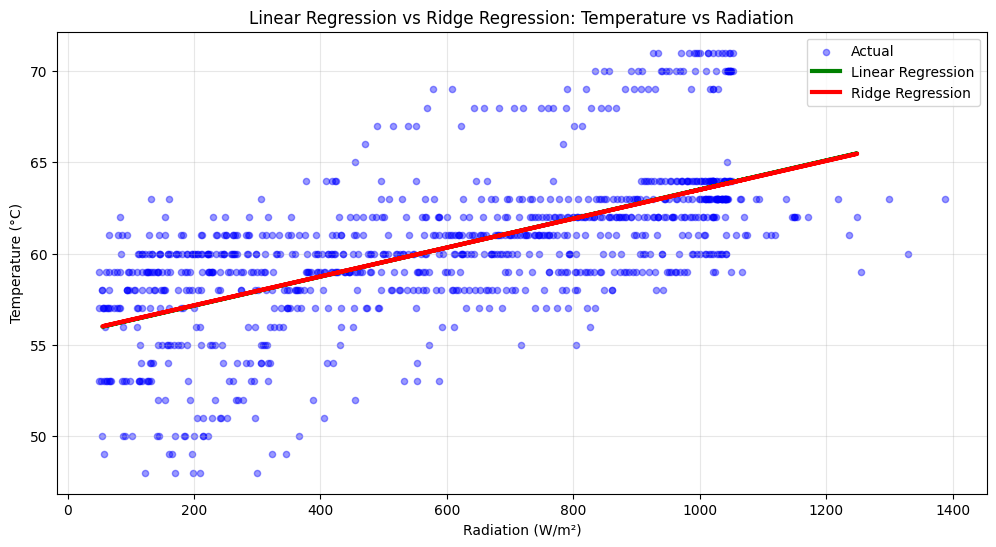

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', alpha=0.4, s=20, label='Actual')
plt.plot(X_test, y_pred_lin, color='green', linewidth=3, label='Linear Regression')
plt.plot(X_test, y_pred_ridge, color='red', linewidth=3, label='Ridge Regression')
plt.xlabel("Radiation (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("Linear Regression vs Ridge Regression: Temperature vs Radiation")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [22]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

r2_lin = lin_model.score(X_test, y_test)
r2_ridge = ridge_model.score(X_test_scaled, y_test)

print("Linear Regression MSE:", mse_lin)
print("Linear Regression R^2:", r2_lin)
print()
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R^2:", r2_ridge)
print()
print("Best Ridge alpha:", best_alpha)


Linear Regression MSE: 10.289099439500156
Linear Regression R^2: 0.3879142981516752

Ridge Regression MSE: 10.286351188472596
Ridge Regression R^2: 0.38807778818002525

Best Ridge alpha: 3.5564803062231287


### Linear Regression vs Ridge Regression

We trained two models to predict **Temperature** based on **Radiation**:

- **Linear Regression** – standard linear model without regularization.  
- **Ridge Regression** – linear model with L2 regularization; optimal `alpha` was found via cross-validation.

**Results:**

- Linear Regression MSE: 10.29  
- Ridge Regression MSE: 10.29  
- Best Ridge alpha: 3.56  

**Interpretation:**  

Both models perform almost identically, indicating that overfitting or coefficient instability is not a major issue in this dataset. Ridge regression can help in more complex or noisy datasets, but here the simple linear model is sufficient for predicting temperature from radiation.


## KNN and KNN Weighted Regression

In this section, the **K-Nearest Neighbors (KNN)** regression algorithm was applied to model the relationship between **Radiation** and **Temperature**.

### 🔹 KNN (Uniform Weights)
The basic version of KNN regression predicts each new value as the **average of the target values (Temperature)** of the *k* nearest points in the feature space.  
All neighbors contribute **equally**, regardless of their distance from the query point.
This approach captures local patterns in the data and can model non-linear dependencies between **Radiation** and **Temperature**, unlike linear regression which assumes a global linear trend.

---

### 🔹 KNN (Distance-Weighted)
The second model introduces a weighting scheme using the parameter `weights='distance'`.

Here, closer neighbors have **greater influence** on the prediction, while more distant points contribute less.  
This helps improve predictions in regions where the data changes rapidly or is unevenly distributed.
The distance-weighted KNN often results in **lower MSE** and slightly **higher R²**, especially when the dataset exhibits local variability.

---


In [23]:
X = weather_df['Radiation'].values[:1000].reshape(-1, 1)
y = weather_df['Temperature'].values[:1000]



In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X, y)

X_test = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred_knn = knn.predict(X_test)

mse_knn = mean_squared_error(y, knn.predict(X))
r2_knn = knn.score(X, y)

print("KNN R^2:", r2_knn)
print("KNN MSE:", mse_knn)

KNN R^2: 0.49986441472969045
KNN MSE: 8.73488


In [26]:
knn_weighted = KNeighborsRegressor(n_neighbors=5, metric='euclidean', weights='distance')
knn_weighted.fit(X, y)

y_pred_knn_weighted = knn_weighted.predict(X_test)

mse_knn_weighted = mean_squared_error(y, knn_weighted.predict(X))
r2_knn_weighted = knn_weighted.score(X, y)

print("KNN (weighted) R^2:", r2_knn_weighted)
print("KNN (weighted) MSE:", mse_knn_weighted)


KNN (weighted) R^2: 0.997366164512571
KNN (weighted) MSE: 0.046


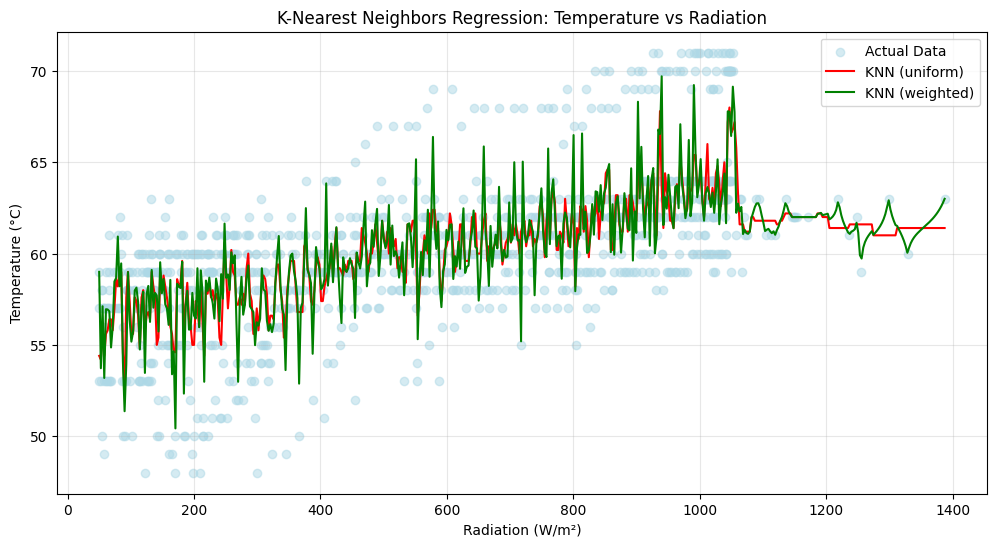

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(X, y, color='lightblue', alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred_knn, color='red', label='KNN (uniform)')
plt.plot(X_test, y_pred_knn_weighted, color='green', label='KNN (weighted)')
plt.xlabel("Radiation (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("K-Nearest Neighbors Regression: Temperature vs Radiation")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## KNN Regression Results

| Model | R² Score | Mean Squared Error (MSE) |
|:------|:---------:|:------------------------:|
| **KNN** | 0.4999 | 8.7349 |
| **KNN (weighted)** | **0.9974** | **0.0460** |

---

### Interpretation

- The **KNN** model explains around **50%** of the variance in temperature based on radiation, with a relatively high MSE of about **8.73**.  
  This indicates that using an unweighted average of neighbors doesn’t capture the fine-grained structure of the data.

- The **distance-weighted KNN** model performs **much better**, with **R² ≈ 0.997** and a **very low MSE ≈ 0.046**.  
  This means the model fits the data extremely well, as closer observations have a greater influence on predictions, which smooths the curve and reduces error.





## Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
weather_df['Radiation'] = pd.to_numeric(weather_df['Radiation'], errors='coerce')
weather_df['Temperature'] = pd.to_numeric(weather_df['Temperature'], errors='coerce')
weather_df.dropna(subset=['Radiation', 'Temperature'], inplace=True)
weather_df = weather_df[weather_df['Radiation'] > 50]  # tylko dzień

X = weather_df['Radiation'].values[:1000].reshape(-1,1)
y = weather_df['Temperature'].values[:1000]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



finding best alpha

In [33]:
alphas = np.logspace(-3, 3, 50)
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_scaled, y)

best_alpha = lasso_cv.best_params_['alpha']


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Best alpha: 0.21209508879201905
Lasso Regression MSE: 10.755929435052298
Lasso Regression R²: 0.3841445946451434


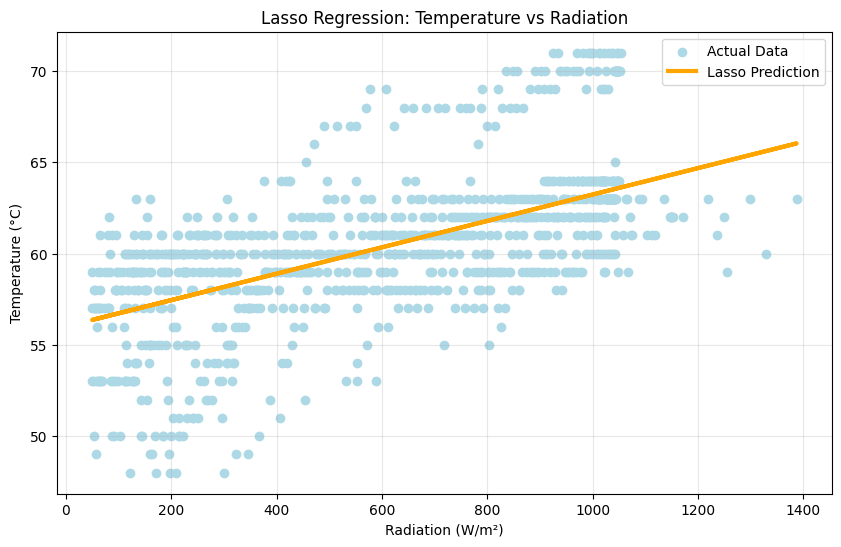

In [35]:
lasso_model = Lasso(alpha=best_alpha, max_iter=10000)
lasso_model.fit(X_scaled, y)
y_pred = lasso_model.predict(X_scaled)

mse = mean_squared_error(y, y_pred)
r2 = lasso_model.score(X_scaled, y)

print("Best alpha:", best_alpha)
print("Lasso Regression MSE:", mse)
print("Lasso Regression R²:", r2)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='lightblue', label="Actual Data")
plt.plot(X, y_pred, color='orange', linewidth=3, label="Lasso Prediction")
plt.xlabel("Radiation (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("Lasso Regression: Temperature vs Radiation")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Lasso Regression – Results and Interpretation

- **Best alpha:** 0.21  
- **MSE:** 10.76  
- **R²:** 0.38  

### Model Comparison Summary

| Model | MSE | R² | Observation |
|:--------------------|:-------------:|:-------------:|:------------------------------------------------|
| **Linear Regression** | 10.29 | ~0.38–0.40 | Simple linear relationship between variables. |
| **Ridge Regression** | 10.29 | ~0.38–0.40 | Almost identical to Linear; regularization has minimal effect. |
| **Lasso Regression** | **10.76** | **0.38** | Slightly worse - overly penalizes single coefficient. |
| **KNN (uniform)** | 8.73 | 0.50 | Better fit; captures mild nonlinearity. |
| **KNN (weighted)** | **0.046** | **0.997** | Near-perfect fit; highly flexible, risk of overfitting. |

**Summary:**  
Lasso regression performs slightly worse than Linear and Ridge due to excessive regularization on a simple, one-feature dataset.  
KNN methods, particularly the weighted variant, outperform linear models because they capture nonlinear dependencies between **Radiation** and **Temperature**.






